In [77]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

from skimage import io, morphology, img_as_bool, segmentation
from scipy import ndimage as ndi
from scipy.ndimage.morphology import binary_fill_holes

%matplotlib inline

In [78]:
def pad_resize(img):
    top = int((224 - img.shape[0])/2)
    left = int((224 - img.shape[1])/2)
    bottom = 224 - img.shape[0] - top
    right = 224 - img.shape[1] - left
    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=255)
    img = img/255.
    img = cv2.resize(img, (64,64)) #KADD
    return img

def skeletonize(img):
    size = np.size(img)
    skel = np.zeros(img.shape,np.uint8)
    img = cv2.bitwise_not(img)
#     element = cv2.getStructuringElement(cv2.MORPH_CROSS,(1,1))
#     done = 0
#     while( done < 1 ):
#         eroded = cv2.erode(img,element)
#         temp = cv2.dilate(eroded,element)
#         temp = cv2.subtract(img,temp)
#         skel = cv2.bitwise_or(skel,temp)
#         img = eroded.copy()

#         zeros = size - cv2.countNonZero(img)
#         if zeros==size:#cv2.countNonZero(img) * 1 >= 0:#
#             done += 1
#     img = skel
    kernel = np.ones((3,3),np.uint8)
    erosion = cv2.erode(img,kernel,iterations = 2)
    img = cv2.bitwise_not(erosion)
    return img

In [130]:
PATH = '../train_images_modified'
images = []
base_class = []
matra_class = []
dot_class = []
total_class = []
half_char_class = []

for filename in os.listdir(PATH):
    if filename.endswith(".png"):
        img = cv2.imread(os.path.join(PATH,filename),0)
        blur = cv2.GaussianBlur(img,(9,9),0)# KADD
        a,img = cv2.threshold(blur,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)#KEDIT
#         plt.imshow(img, cmap='gray')
#         plt.show()
# #         kernel = np.ones((5,5),np.uint8)
#         img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
#         plt.imshow(img, cmap='gray')
#         plt.show()
        #img = skeletonize(img)
        img = pad_resize(img)
        char_arr = filename[:-4].split('_')[3:]
        if(len(char_arr)>0):
            images.append(img)
            char_arr = [int(i) for i in char_arr]
            total_class.append(char_arr)
            base = [i for i in char_arr if (i>=2308 and i<=2361) or (i==2384) or (i>=2392 and i<=2401) or (i>=2404 and i!=2416 and i!=2417)]  
            base_class.append(base[0])
            dot = [i for i in char_arr if i in [2306,2416,2417]]
            if(len(dot)>0):
                dot_class.append(1)
            else:
                dot_class.append(0)
            matra = [i for i in char_arr if (i>=2304 and i<=2307) or (i>=2362 and i<=2380) or (i>=2382 and i<=2383) or (i>=2385 and i<=2391) or (i>=2402 and i<=2403)]
            if(len(matra)>0):
                matra_class.append(matra[0])
            else:
                matra_class.append(0)
            half_char = [i for i in char_arr if (i==2381)]
            if(len(half_char)>0):
                half_char_class.append(1)
            else:
                half_char_class.append(0)
#             if(len(char_arr)>1):          
#                 matra_class.append(char_arr[1:])
            if len(images)%100==0:
                print("{} Done".format(len(images)))
            
# print(len(images))
# print(len(char_class))
# print(images[0])
# print(char_class[0])

100 Done
200 Done
300 Done
400 Done
500 Done
600 Done
700 Done
800 Done
900 Done
1000 Done
1100 Done
1200 Done
1300 Done
1400 Done
1500 Done
1600 Done
1700 Done
1800 Done


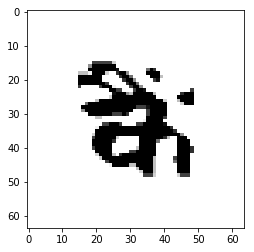

1895


In [80]:
plt.imshow(images[102],"gray")
plt.show()
print(len(images))

In [83]:
np.argmax(model.predict(X_train[0].reshape(-1,64,64,1)))

7

In [24]:
half_images = []
for image in images:
    half_im = np.hsplit(image,2)
    half_images.append(half_im[0])

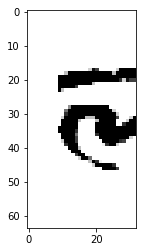

In [25]:
plt.imshow(half_images[6],"gray")
plt.show()

In [128]:
img = plt.imread('ok.png')

In [129]:
img

array([[[ 0.42352942,  0.34901962,  0.22352941,  1.        ],
        [ 0.43529412,  0.36078432,  0.24313726,  1.        ],
        [ 0.45490196,  0.3764706 ,  0.27058825,  1.        ],
        ..., 
        [ 0.13333334,  0.12156863,  0.15686275,  1.        ],
        [ 0.14901961,  0.12941177,  0.15686275,  1.        ],
        [ 0.18431373,  0.16470589,  0.1882353 ,  1.        ]],

       [[ 0.45490196,  0.38039216,  0.25490198,  1.        ],
        [ 0.44313726,  0.36862746,  0.25098041,  1.        ],
        [ 0.43921569,  0.36078432,  0.25490198,  1.        ],
        ..., 
        [ 0.14117648,  0.12941177,  0.16470589,  1.        ],
        [ 0.12941177,  0.10980392,  0.13725491,  1.        ],
        [ 0.13725491,  0.11764706,  0.14117648,  1.        ]],

       [[ 0.46666667,  0.39215687,  0.27450982,  1.        ],
        [ 0.44313726,  0.36862746,  0.25098041,  1.        ],
        [ 0.42352942,  0.34901962,  0.23137255,  1.        ],
        ..., 
        [ 0.14509805,  0

In [26]:
len(set(base_class))

53

In [29]:
matra_class

[2368,
 2306,
 0,
 0,
 0,
 0,
 2366,
 0,
 2366,
 0,
 2376,
 2367,
 0,
 0,
 0,
 0,
 2370,
 2375,
 2375,
 0,
 2367,
 0,
 2367,
 0,
 0,
 0,
 0,
 2376,
 0,
 2366,
 2375,
 0,
 2380,
 2366,
 0,
 2366,
 0,
 2366,
 2379,
 2375,
 2376,
 2367,
 0,
 0,
 0,
 0,
 2380,
 2367,
 0,
 0,
 2380,
 0,
 0,
 2306,
 0,
 0,
 2380,
 0,
 2380,
 0,
 0,
 0,
 0,
 2367,
 2368,
 0,
 0,
 0,
 0,
 2376,
 0,
 0,
 2366,
 0,
 0,
 2375,
 2366,
 2370,
 2368,
 0,
 2370,
 2367,
 0,
 2366,
 0,
 0,
 0,
 2306,
 2367,
 2366,
 0,
 2375,
 2366,
 0,
 0,
 2306,
 2306,
 0,
 0,
 0,
 0,
 2379,
 2376,
 2368,
 0,
 2379,
 2368,
 2367,
 2368,
 0,
 0,
 0,
 0,
 0,
 0,
 2366,
 0,
 2367,
 2306,
 2369,
 2366,
 2368,
 2376,
 2366,
 2370,
 2370,
 2363,
 0,
 0,
 2366,
 2368,
 0,
 0,
 2366,
 0,
 0,
 0,
 2369,
 0,
 0,
 2367,
 0,
 0,
 0,
 2366,
 0,
 0,
 0,
 0,
 2367,
 2367,
 2366,
 0,
 2366,
 2366,
 0,
 2366,
 2379,
 0,
 2366,
 0,
 2366,
 2366,
 2367,
 2366,
 2368,
 2366,
 2366,
 0,
 0,
 2375,
 2375,
 2306,
 2367,
 2366,
 0,
 2375,
 2366,
 0,
 0,
 0,


In [90]:
images = np.array(images)
X = np.reshape(np.array(images), (-1, 64*64))
y = np.array(base_class)

df = pd.DataFrame(X, y)
df['LABEL'] = df.index

df_no_label = df.drop(columns='LABEL')

2407

In [88]:
temp = np.reshape(X[0],(-1,64,64,1))
np.argmax(model.predict(temp))

7

In [31]:
df_no_label.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
2325,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2350,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2347,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2360,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2312,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [113]:
import keras
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

le = LabelEncoder()
le.fit(base_class)
y_labeled = le.transform(base_class)
y_train = np_utils.to_categorical(y_labeled)

In [114]:
base_dict = { i:le.classes_[i] for i in range(len(le.classes_))}

In [127]:
le_dot.classes_

array([0, 1])

In [33]:
print(y_train.shape)
X_train = np.reshape(images,(-1,64,64,1))
print(X_train.shape)

(1895, 53)
(1895, 64, 64, 1)


In [34]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,LABEL
2325,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2325
2350,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2350
2347,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2347
2360,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2360
2312,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2312


# Consonant Class

In [42]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPooling2D

model = Sequential()
model.add(Conv2D(16,(3,3),input_shape=(X_train[0].shape),activation = 'relu'))
model.add(Conv2D(16,(3,3),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(2,2),activation = 'relu'))
model.add(Conv2D(32,(2,2),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,(2,2),activation = 'relu'))
model.add(Conv2D(64,(2,2),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation = 'sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(len(set(base_class)),activation = 'softmax'))

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 16)        160       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 32)        2080      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        4128      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        8256      
__________

In [44]:
import keras.backend as K

def f1_score(theta):
    def score(y_true, y_pred):

        y_thresh = K.cast(K.greater(y_pred,theta),K.floatx())

        true_pos =  K.sum(y_true * y_thresh)
        false_pos = K.sum(y_true * (1. - y_thresh))
        false_neg = K.sum((1. - y_true) * y_thresh)

        precision = true_pos / (true_pos + false_pos)
        recall = true_pos / (true_pos + false_neg)
        
        f1_score_val = 2 * (precision * recall) / (precision + recall)
        return f1_score_val
    return score

def custom_metric(y_true, y_pred):
    return K.cast(K.equal(y_true,
                          K.round(y_pred)),
                  K.floatx())

In [45]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[f1_score(theta=0.5), 'categorical_accuracy'])

In [46]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='consonantweights.best.hdf5', verbose=1, save_best_only=True)

In [47]:
model.fit(X_train,y_train,epochs=20,batch_size=32,callbacks=[checkpointer],validation_split=0.3)

Train on 1326 samples, validate on 569 samples
Epoch 1/20
1326/1326 [==============================] - 12s 9ms/step - loss: 3.6175 - score: nan - categorical_accuracy: 0.0679 - val_loss: 3.3854 - val_score: nan - val_categorical_accuracy: 0.0914
Epoch 2/20
1326/1326 [==============================] - 12s 9ms/step - loss: 3.4242 - score: nan - categorical_accuracy: 0.0950 - val_loss: 3.2805 - val_score: nan - val_categorical_accuracy: 0.1301
Epoch 3/20
1326/1326 [==============================] - 12s 9ms/step - loss: 3.1483 - score: nan - categorical_accuracy: 0.1817 - val_loss: 2.7800 - val_score: nan - val_categorical_accuracy: 0.2953
Epoch 4/20
1326/1326 [==============================] - 12s 9ms/step - loss: 2.5761 - score: nan - categorical_accuracy: 0.3484 - val_loss: 2.3179 - val_score: 0.1959 - val_categorical_accuracy: 0.4148
Epoch 5/20
1326/1326 [==============================] - 13s 9ms/step - loss: 2.0570 - score: 0.3394 - categorical_accuracy: 0.4691 - val_loss: 1.9170 - va

In [48]:
new_adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=new_adam,
              loss='categorical_crossentropy',
              metrics=[f1_score(theta=0.5), 'categorical_accuracy'])
model.fit(X_train,y_train,epochs=30,batch_size=32,callbacks = [checkpointer],validation_split=0.3)

Train on 1326 samples, validate on 569 samples
Epoch 1/30
1326/1326 [==============================] - 16s 12ms/step - loss: 0.1645 - score: 0.9640 - categorical_accuracy: 0.9781 - val_loss: 0.9457 - val_score: 0.7535 - val_categorical_accuracy: 0.7487
Epoch 2/30
1326/1326 [==============================] - 15s 11ms/step - loss: 0.1518 - score: 0.9697 - categorical_accuracy: 0.9842 - val_loss: 0.9456 - val_score: 0.7598 - val_categorical_accuracy: 0.7469
Epoch 3/30
1326/1326 [==============================] - 14s 10ms/step - loss: 0.1428 - score: 0.9745 - categorical_accuracy: 0.9819 - val_loss: 0.9403 - val_score: 0.7535 - val_categorical_accuracy: 0.7469
Epoch 4/30
1326/1326 [==============================] - 14s 10ms/step - loss: 0.1352 - score: 0.9709 - categorical_accuracy: 0.9842 - val_loss: 0.9399 - val_score: 0.7544 - val_categorical_accuracy: 0.7504
Epoch 5/30
1326/1326 [==============================] - 13s 10ms/step - loss: 0.1252 - score: 0.9810 - categorical_accuracy: 0.98

Epoch 23/30
1326/1326 [==============================] - 15s 11ms/step - loss: 0.0658 - score: 0.9935 - categorical_accuracy: 0.9962 - val_loss: 0.9373 - val_score: 0.7666 - val_categorical_accuracy: 0.7592
Epoch 24/30
1326/1326 [==============================] - 15s 11ms/step - loss: 0.0626 - score: 0.9946 - categorical_accuracy: 0.9940 - val_loss: 0.9382 - val_score: 0.7703 - val_categorical_accuracy: 0.7645
Epoch 25/30
1326/1326 [==============================] - 17s 13ms/step - loss: 0.0656 - score: 0.9908 - categorical_accuracy: 0.9940 - val_loss: 0.9448 - val_score: 0.7684 - val_categorical_accuracy: 0.7575
Epoch 26/30
1326/1326 [==============================] - 15s 12ms/step - loss: 0.0627 - score: 0.9919 - categorical_accuracy: 0.9925 - val_loss: 0.9416 - val_score: 0.7684 - val_categorical_accuracy: 0.7575
Epoch 27/30
1326/1326 [==============================] - 14s 11ms/step - loss: 0.0591 - score: 0.9958 - categorical_accuracy: 0.9977 - val_loss: 0.9400 - val_score: 0.7704 

array([ 1.])

# Matra Class

In [117]:
y_matra = np.array(matra_class)

In [118]:
le_matra = LabelEncoder()
le_matra.fit(matra_class)
y_matra_labeled = le_matra.transform(matra_class)
y_matra_train = np_utils.to_categorical(y_matra_labeled)

In [120]:
matra_dict = {i:le_matra.classes_[i] for i in range(len(le_matra.classes_))}

In [63]:
len(y_matra_train[0])

18

In [64]:
model = Sequential()
model.add(Conv2D(16,(2,2),input_shape=(X_train[0].shape),activation = 'relu'))
model.add(Conv2D(32,(2,2),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(2,2),activation = 'relu'))
model.add(Conv2D(32,(2,2),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,(2,2),activation = 'relu'))
model.add(Conv2D(64,(2,2),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation = 'sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(len(set(matra_class)),activation = 'softmax'))

In [65]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[f1_score(theta=0.5), 'categorical_accuracy'])

In [66]:
checkpointer_matra = ModelCheckpoint(filepath='matraweights.best.hdf5', verbose=1, save_best_only=True)

In [67]:
model.fit(X_train,y_matra_train,epochs=10,batch_size=32,callbacks=[checkpointer_matra],validation_split=0.3)

Train on 1326 samples, validate on 569 samples
Epoch 1/10
1326/1326 [==============================] - 13s 10ms/step - loss: 2.1072 - score: nan - categorical_accuracy: 0.4012 - val_loss: 1.8113 - val_score: 0.4242 - val_categorical_accuracy: 0.4675
Epoch 2/10
1326/1326 [==============================] - 11s 9ms/step - loss: 1.5304 - score: 0.5034 - categorical_accuracy: 0.5415 - val_loss: 1.1486 - val_score: 0.6420 - val_categorical_accuracy: 0.6503
Epoch 3/10
1326/1326 [==============================] - 11s 9ms/step - loss: 1.1078 - score: 0.6657 - categorical_accuracy: 0.6757 - val_loss: 0.8995 - val_score: 0.7209 - val_categorical_accuracy: 0.7346
Epoch 4/10
1326/1326 [==============================] - 11s 9ms/step - loss: 0.9289 - score: 0.7162 - categorical_accuracy: 0.7172 - val_loss: 0.7975 - val_score: 0.7286 - val_categorical_accuracy: 0.7540
Epoch 5/10
1326/1326 [==============================] - 11s 9ms/step - loss: 0.8040 - score: 0.7427 - categorical_accuracy: 0.7496 - va

In [71]:
len(X_train[0])

64

In [ ]:
new_adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=new_adam,
              loss='categorical_crossentropy',
              metrics=[f1_score(theta=0.5), 'categorical_accuracy'])
model.fit(X_train,y_matra_train,epochs=30,batch_size=32,callbacks = [checkpointer_matra],validation_split=0.3)

# Dot Class

In [50]:
y_dot = np.array(dot_class)

In [121]:
le_dot = LabelEncoder()
le_dot.fit(dot_class)
y_dot_labeled = le_dot.transform(dot_class)
y_dot_train = np_utils.to_categorical(y_dot_labeled)

In [122]:
dot_dict = {i:le_dot.classes_[i] for i in range(len(le_dot.classes_))}

In [123]:
complete_dicts = [base_dict,matra_dict,dot_dict]

In [124]:
import pickle

with open("dicts.txt", "wb") as fp:   #Pickling
    pickle.dump(complete_dicts, fp)

In [52]:
len(y_dot_train[0])

2

In [53]:
model = Sequential()
model.add(Conv2D(16,(2,2),input_shape=(X_train[0].shape),activation = 'relu'))
model.add(Conv2D(32,(2,2),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,(2,2),activation = 'relu'))
model.add(Conv2D(64,(2,2),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation = 'sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(len(set(dot_class)),activation = 'softmax'))

In [54]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[f1_score(theta=0.5), 'categorical_accuracy'])

In [55]:
checkpointer_dot = ModelCheckpoint(filepath='dotweights.best.hdf5', verbose=1, save_best_only=True)

In [56]:
model.fit(X_train,y_dot_train,epochs=3,batch_size=32,callbacks = [checkpointer_dot],validation_split=0.3)

Train on 1326 samples, validate on 569 samples
Epoch 1/3
1326/1326 [==============================] - 20s 15ms/step - loss: 0.3076 - score: 0.9238 - categorical_accuracy: 0.9238 - val_loss: 0.2820 - val_score: 0.9174 - val_categorical_accuracy: 0.9174
Epoch 2/3
1326/1326 [==============================] - 19s 15ms/step - loss: 0.2486 - score: 0.9314 - categorical_accuracy: 0.9314 - val_loss: 0.2269 - val_score: 0.9209 - val_categorical_accuracy: 0.9209
Epoch 3/3
1326/1326 [==============================] - 19s 14ms/step - loss: 0.1914 - score: 0.9359 - categorical_accuracy: 0.9359 - val_loss: 0.2023 - val_score: 0.9192 - val_categorical_accuracy: 0.9192


1895

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[f1_score(theta=0.5), 'categorical_accuracy'])
model.fit(X_train,y_matra_train,epochs=30,batch_size=32,callbacks = [checkpointer_dot],validation_split=0.3)

# Half-consonant model

In [214]:
half_images = np.array(half_images)
X_half = np.reshape(np.array(images), (-1, 64*32))
y_half = np.array(base_class)

In [221]:
le_half = LabelEncoder()
le_half.fit(base_class)
y_half_labeled = le_half.transform(base_class)
y_half_train = np_utils.to_categorical(y_half_labeled)

In [222]:
print(y_half_train.shape)
X_half_train = np.reshape(half_images,(-1,64,32,1))
print(X_half_train.shape)

(1895, 53)
(1895, 64, 32, 1)


In [225]:
model = Sequential()
model.add(Conv2D(16,(2,2),input_shape=(X_half_train[0].shape),activation = 'relu'))
model.add(Conv2D(32,(2,2),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(2,2),activation = 'relu'))
model.add(Conv2D(32,(2,2),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,(2,2),activation = 'relu'))
model.add(Conv2D(64,(2,2),activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation = 'sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(len(set(base_class)),activation = 'softmax'))

In [226]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[f1_score(theta=0.5), 'categorical_accuracy'])

In [227]:
model.fit(X_half_train,y_half_train,epochs=30,batch_size=32,validation_split=0.3)

Train on 1326 samples, validate on 569 samples
Epoch 1/30
1326/1326 [==============================] - 7s 5ms/step - loss: 3.6615 - score: nan - categorical_accuracy: 0.0664 - val_loss: 3.3703 - val_score: nan - val_categorical_accuracy: 0.0914
Epoch 2/30
1326/1326 [==============================] - 6s 4ms/step - loss: 3.4355 - score: nan - categorical_accuracy: 0.0852 - val_loss: 3.3377 - val_score: nan - val_categorical_accuracy: 0.0914
Epoch 3/30
1326/1326 [==============================] - 6s 4ms/step - loss: 3.3377 - score: nan - categorical_accuracy: 0.1131 - val_loss: 3.2372 - val_score: nan - val_categorical_accuracy: 0.1617
Epoch 4/30
1326/1326 [==============================] - 6s 4ms/step - loss: 3.2198 - score: nan - categorical_accuracy: 0.1463 - val_loss: 3.1289 - val_score: nan - val_categorical_accuracy: 0.1564
Epoch 5/30
1326/1326 [==============================] - 6s 4ms/step - loss: 3.0673 - score: nan - categorical_accuracy: 0.1855 - val_loss: 3.0091 - val_score: na

In [243]:
img = cv2.imread(os.path.join('','test.png'),0)
img

array([[142, 144, 141, ..., 142, 147, 150],
       [149, 148, 147, ..., 143, 147, 150],
       [150, 152, 152, ..., 148, 148, 150],
       ..., 
       [144, 146, 146, ..., 158, 155, 151],
       [146, 150, 149, ..., 168, 163, 159],
       [143, 145, 147, ..., 166, 165, 164]], dtype=uint8)

In [244]:
blur = cv2.GaussianBlur(img,(9,9),0)# KADD
a,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)#KEDIT
img = pad_resize(img)
blur = cv2.GaussianBlur(img,(9,9),0)# KADD

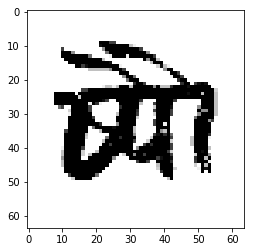

In [245]:
plt.imshow(img,"gray")
plt.show()

In [251]:
half_img = np.hsplit(img,2)

In [252]:
X_half = np.reshape(np.array(half_img[0]), (-1, 64*32))

In [253]:
X_half_train = np.reshape(half_img[0],(-1,64,32,1))

In [254]:
model.predict_classes(X_half_train)

array([6])

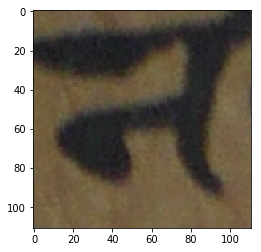

In [157]:
im = plt.imread('ok.png')
plt.imshow(im)
plt.show()

In [166]:
im[:,:,:3].shape

(111, 111, 3)

In [185]:
im[:,:,3]
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
image = rgb2gray(im)

In [191]:
image.shape
src.create(rows, cols, CV_8UC1);
src = imread(your-file, CV_8UC1);

NameError: name 'src' is not defined

In [190]:
blur = cv2.GaussianBlur(image,(9,9),0)
a,img = cv2.threshold(blur,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

error: /io/opencv/modules/imgproc/src/thresh.cpp:1356: error: (-215) src.type() == CV_8UC1 in function threshold
